# Task 2 by NEHA NIHARIKA KAR

## Prediction using Unsupervised ML

From the given Iris dataset, predict the optimum number of clusters and represent it visually, using the K-Means clustering model.

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

### Importing the Data

In [2]:
df = datasets.load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# representing the iris dataset in a tabular form
iris = pd.DataFrame(np.c_[df['data'], df['target']], columns = np.append(df['feature_names'], ['target']))
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Target 0 represents Setosa species.

Target 1 represents Versicolor species.

Target 2 represents Virginica species.

In [7]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### Determining the Clusters using the Elbow method

In [9]:
# finding the optimum number of clusters for k-means classification
x = iris.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

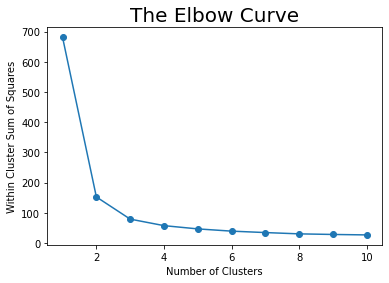

In [10]:
# plotting the results using the Elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Curve', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

The optimum number of clusters is where the Elbow occurs, which is roughly after 3. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this, we choose the number of clusters as 3.

### Training the Clustering Model

In [11]:
# creating k-means classifier using 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [12]:
y = kmeans.predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [14]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualization using Sepal Length and Sepal Width columns

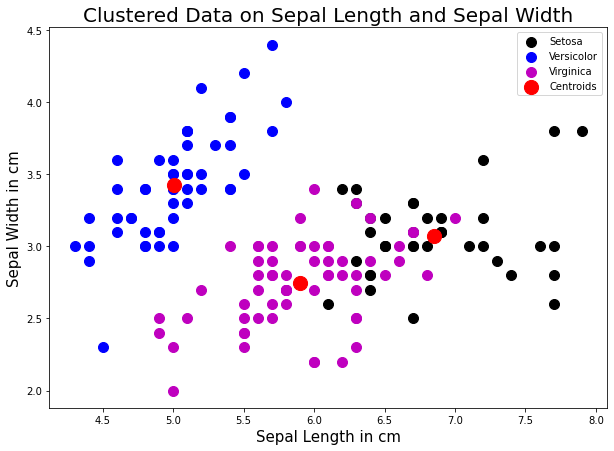

In [15]:
# visualizing the clusters on Sepal Length and Sepal Width
plt.figure(figsize = (10,7))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'k', label = 'Setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'b', label = 'Versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'm', label = 'Virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'r', label = 'Centroids')
plt.title('Clustered Data on Sepal Length and Sepal Width', size=20)
plt.xlabel('Sepal Length in cm', size=15)
plt.ylabel('Sepal Width in cm', size=15)
plt.legend(loc = 'upper right')
plt.show()

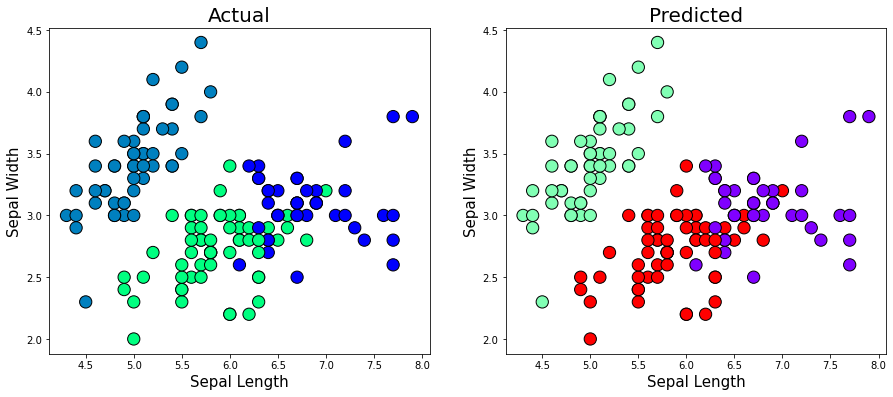

In [16]:
# plotting the identified clusters and comparing with the answers
new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='winter', edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='rainbow', edgecolor='k', s=150)

axes[0].set_xlabel('Sepal Length', fontsize=15)
axes[0].set_ylabel('Sepal Width', fontsize=15)
axes[1].set_xlabel('Sepal Length', fontsize=15)
axes[1].set_ylabel('Sepal Width', fontsize=15)

axes[0].set_title('Actual', fontsize=20)
axes[1].set_title('Predicted', fontsize=20)
plt.show()

The graphs indicate a good accuracy of the clustering model.

### Visualization using Petal Length and Petal Width columns

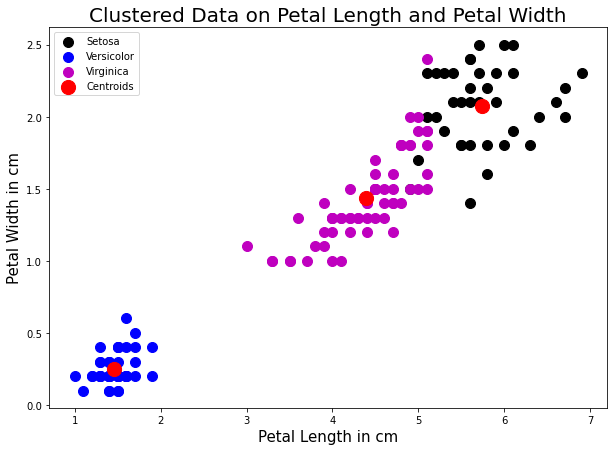

In [17]:
# visualizing the clusters on Petal Length and Petal Width
plt.figure(figsize = (10,7))
plt.scatter(x[y == 0, 2], x[y == 0, 3], s = 100, c = 'k', label = 'Setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], s = 100, c = 'b', label = 'Versicolor')
plt.scatter(x[y == 2, 2], x[y == 2, 3], s = 100, c = 'm', label = 'Virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 200, c = 'r', label = 'Centroids')
plt.title('Clustered Data on Petal Length and Petal Width', size=20)
plt.xlabel('Petal Length in cm', size=15)
plt.ylabel('Petal Width in cm', size=15)
plt.legend(loc = 'upper left')
plt.show()

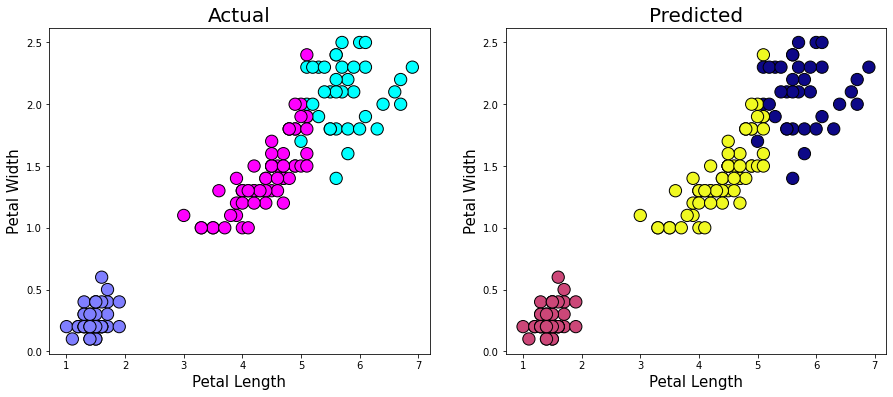

In [18]:
# plotting the identified clusters and comparing with the answers
new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].scatter(x[:, 2], x[:, 3], c=y, cmap='cool', edgecolor='k', s=150)
axes[1].scatter(x[:, 2], x[:, 3], c=new_labels, cmap='plasma', edgecolor='k', s=150)

axes[0].set_xlabel('Petal Length', fontsize=15)
axes[0].set_ylabel('Petal Width', fontsize=15)
axes[1].set_xlabel('Petal Length', fontsize=15)
axes[1].set_ylabel('Petal Width', fontsize=15)

axes[0].set_title('Actual', fontsize=20)
axes[1].set_title('Predicted', fontsize=20)
plt.show()

The graphs indicate a good accuracy of the clustering model.

### Predictions

In [19]:
sample1 = np.array([1.5, 1.2, 7.8, 4])
test1 = sample1.reshape(1, -1)
kmeans.predict(test1)

array([2])

Sample 1 belongs to Virginica species.

In [20]:
sample2 = np.array([4.5, 5.2, 2.8, 2])
test2 = sample2.reshape(1, -1)
kmeans.predict(test2)

array([1])

Sample 2 belongs to Versicolor species.

In [21]:
sample3 = np.array([5.9, 3.9, 6.5, 0.7])
test3 = sample3.reshape(1, -1)
kmeans.predict(test3)

array([0])

Sample 3 belongs to Setosa species.